In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from numpy.random import multinomial

def bootstrap(series, n=1000, *args, **kwargs):
    return multinomial(series.sum(), series/series.sum(), n)

In [5]:
import numpy as np

from lint.models import Bucket

def plot_bootstrap(token, w=5, h=5):
    
    series = Bucket.token_series(token)
    
    expected = series.sum() / len(series)

    bs = bootstrap(np.full(len(series), expected))

    plt.figure(figsize=(w, h))

    plt.plot(bs.mean(0))

    plt.fill_between(
        range(100),
        bs.mean(0) + 2*bs.std(0),
        bs.mean(0) - 2*bs.std(0),
        color='black',
        alpha=0.1,
    )
    
    plt.plot(series)
    
    zscores = np.array([
        abs(mean-observed)/std
        for mean, std, observed in zip(bs.mean(0), bs.std(0), series)
        if mean > 0
    ])

    print(token, zscores.mean())
    plt.show()

school 12.9824855823


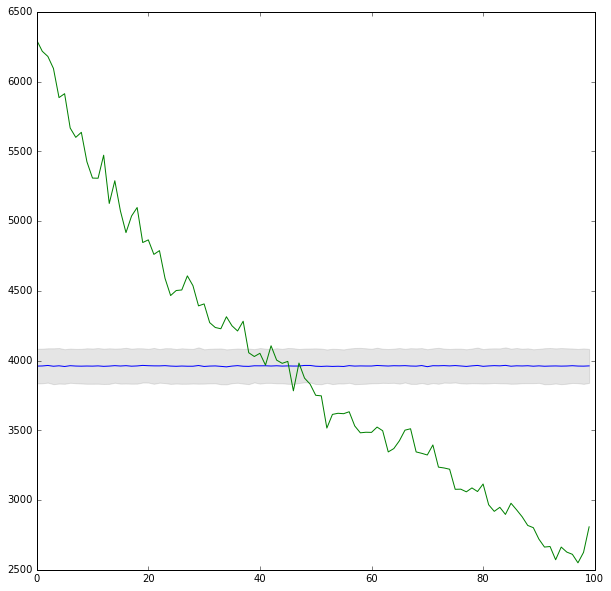

In [6]:
plot_bootstrap('school', 10, 10)

In [7]:
def mean_zscore(token):
    
    series = Bucket.token_series(token)
    
    expected = series.sum() / len(series)

    bs = bootstrap(np.full(len(series), expected))
    
    zscores = np.array([
        abs(mean-observed)/std
        for mean, std, observed in zip(bs.mean(0), bs.std(0), series)
        if mean > 0
    ])

    return zscores.mean()

In [8]:
from joblib import Memory

from lint.models import Bucket

mem = Memory('cache')

token_counts = mem.cache(Bucket.token_counts)

tokens = token_counts(10000)

In [9]:
data = []
for i, (token, count) in enumerate(tokens.items()):
    
    score = mean_zscore(token)
    
    data.append((token, count, score))
        
    if i%1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000


In [10]:
import pandas as pd

df = pd.DataFrame(data, columns=('token', 'count', 'score'))

df.sort_values('score', ascending=False, inplace=True)

In [14]:
pd.set_option('display.max_rows', 1000)

df.head(200)

token      count      score
6              a   45684348  22.345589
15           you   23542825  20.365020
25             -   13249381  19.126938
7              i   36733423  18.452736
8              “   36205440  17.725938
1            the  112947793  15.499071
179        young    1549495  14.452772
5             of   51452477  14.291014
232        years    1169616  13.845387
40            me    8766124  13.572845
24            .”   14227808  13.404796
33           him   10476264  13.109803
544       school     396117  12.970505
2              .  105150037  12.611760
9              ’   35361460  11.856259
176       father    1575272  11.706041
61            ?”    5695581  11.552716
4543         iii      33351  11.451337
185       mother    1490423  11.397546
63             !    5412171  11.114548
201         love    1405020  11.060942
4             to   54882906  10.892586
75          will    4432656  10.733731
0              ,  136776034  10.194319
2891          ii      57948  10.053962
341        death     641728  10.029777
11            he   31435123   9.945633
346         hair     634637   9.885403
36          said    9404296   9.841067
34             t   10147702   9.818945
77           now    4309230   9.660984
260          god     958040   9.457448
13          that   25428472   9.438386
18           she   19381716   9.352022
3701          iv      42958   9.303017
14            it   24829788   9.247785
51          what    6623401   9.244785
52            we    6602303   9.244340
38          have    9311300   9.159613
279          boy     823714   9.090158
701          age     293538   8.931411
58             ?    5940381   8.916578
68            do    4938855   8.873326
110          old    2548971   8.864551
416         year     507131   8.846751
834         tall     234906   8.794570
2378           2      73693   8.773360
2326           3      75225   8.768767
3            and   62187444   8.573834
345         dead     637599   8.566056
233         girl    1168540   8.563217
30           not   12059627   8.488522
649        girls     323946   8.422518
7584         vii      17156   8.288776
56            an    6304741   8.271676
452         blue     478635   8.236206
37            ,”    9393975   8.194276
7361        viii      17838   8.169239
129        again    2224032   8.146487
227         miss    1200708   8.074400
371       family     578968   8.034072
55            if    6346090   7.914890
482       letter     444021   7.906302
1494     college     125412   7.870120
6732          ix      20104   7.849398
42             —    8449210   7.787518
685        brown     300837   7.767735
131           !”    2185286   7.746496
152         life    1846601   7.740333
95           don    2975660   7.736903
286        small     784729   7.681474
217        heart    1260410   7.644304
4716          vi      31730   7.597291
194         told    1437092   7.595347
421        large     501272   7.573724
858         kill     228066   7.544547
3800           6      41626   7.539741
469      chapter     456914   7.523268
16           his   21356901   7.378783
86           can    3626081   7.359440
117        think    2418204   7.320712
219       always    1246689   7.312455
76          like    4364053   7.257973
846          joy     231156   7.231143
161         tell    1750011   7.207942
83          know    3801333   7.206675
66            or    5137354   7.172983
1024   happiness     190329   7.168262
919        books     212154   7.107964
660          die     316574   7.043277
1869    prisoner      97364   7.032106
824       killed     238654   7.020166
133          its    2177118   7.013757
89        little    3292197   6.903035
2720           5      62538   6.901156
1497     forgive     125315   6.889073
653         boys     320746   6.871936
70         could    4820648   6.866459
115          has    2456639   6.803900
74          your    4517160   6.750749
558        loved     385353   6.682498
301        black     741254   6.6

a 22.3351735535


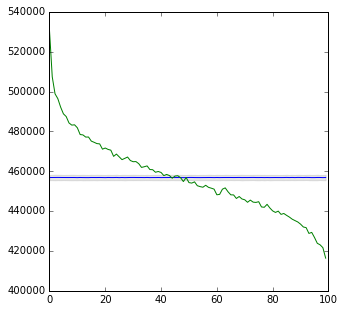

you 20.4341210612


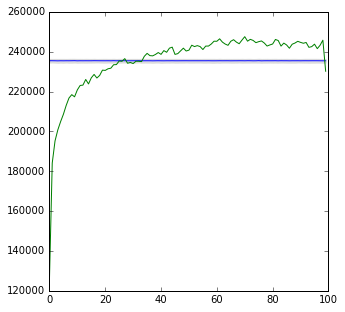

- 19.2990143528


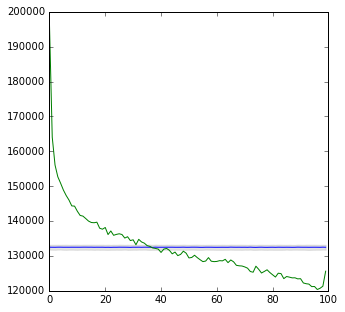

i 18.2915538384


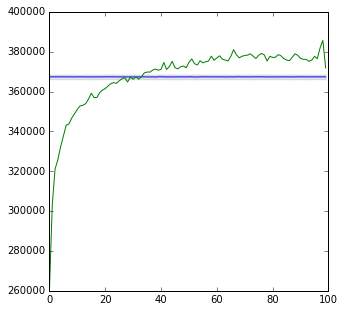

“ 17.6828615093


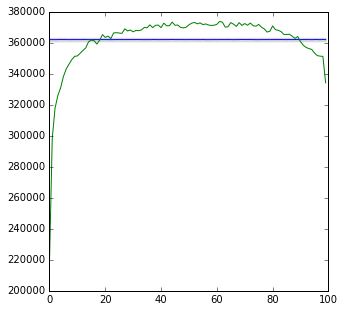

the 15.4542022793


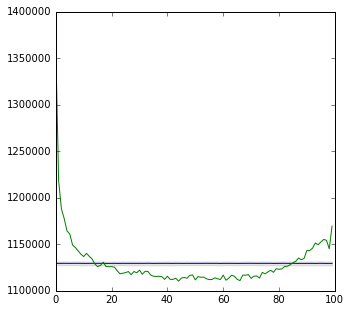

young 14.3295221763


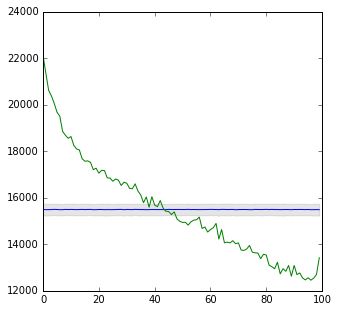

of 14.4059415557


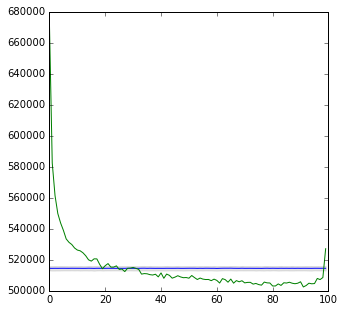

years 13.9167843442


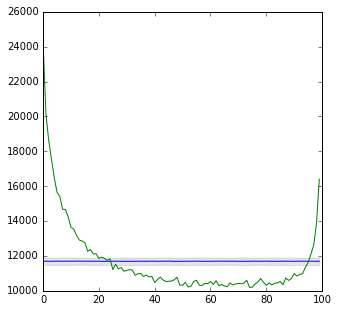

me 13.664781762


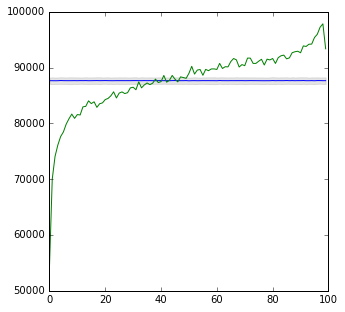

.” 13.3868086079


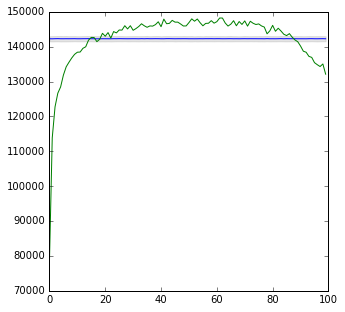

him 13.1190623103


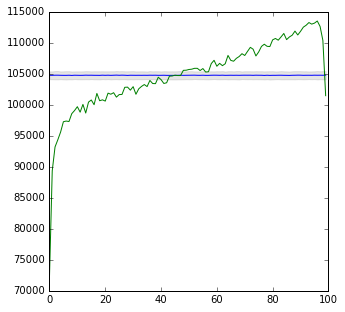

school 13.0132183023


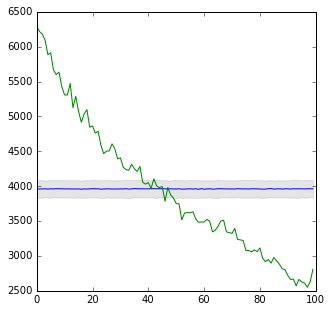

. 12.6553494697


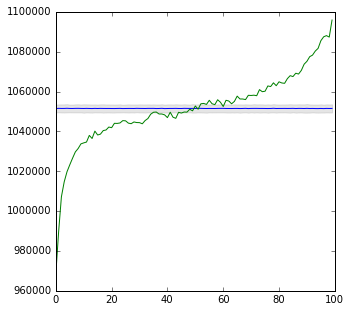

’ 11.8211323434


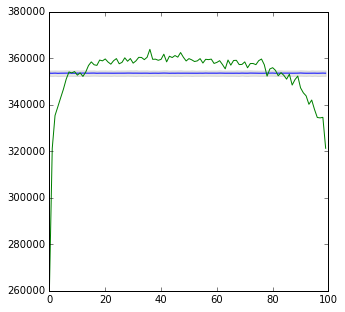

father 11.7616199933


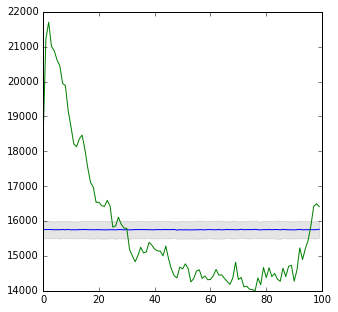

?” 11.5859916714


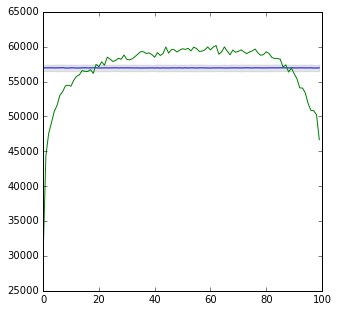

iii 11.4802475911


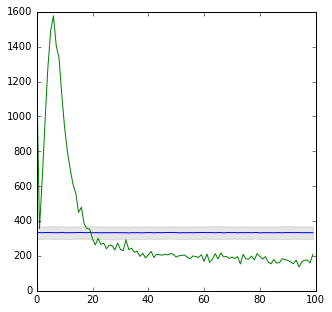

mother 11.4122051408


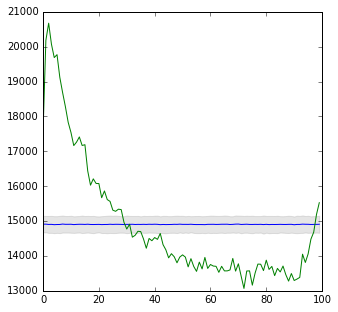

! 11.0938649141


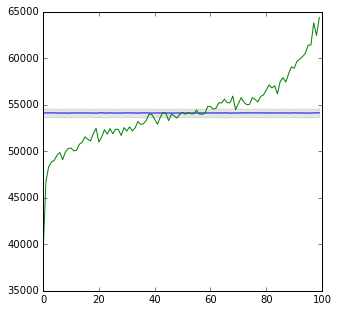

love 11.0912440934


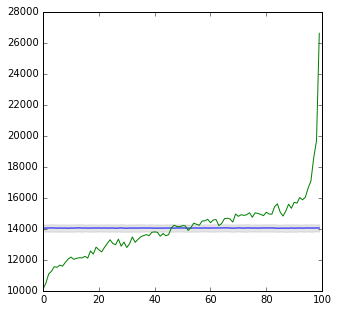

to 10.8897351623


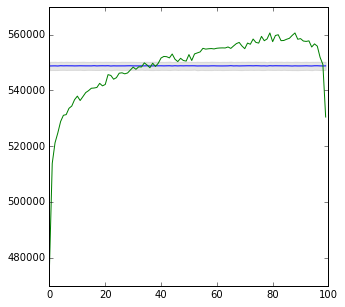

will 10.8041357446


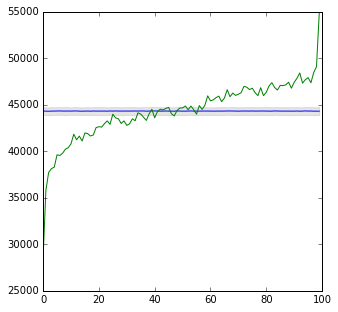

, 10.2252504667


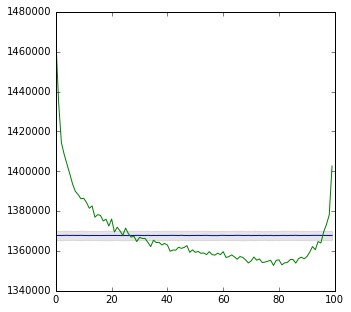

ii 9.98597450593


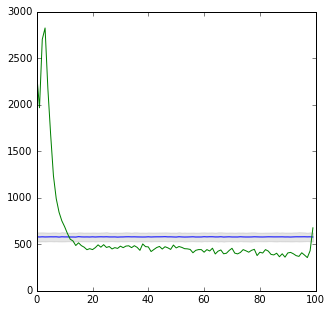

death 10.0027591752


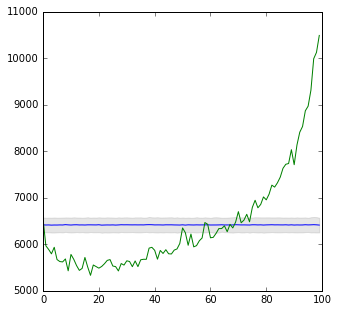

he 9.94601149228


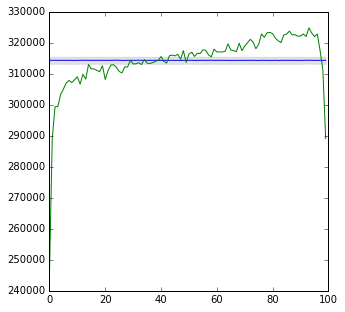

hair 9.86989136595


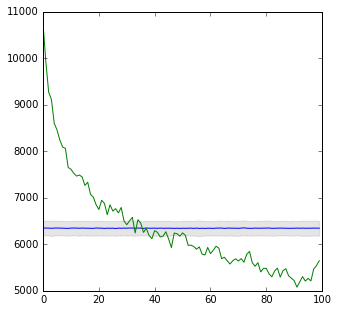

said 9.92947148756


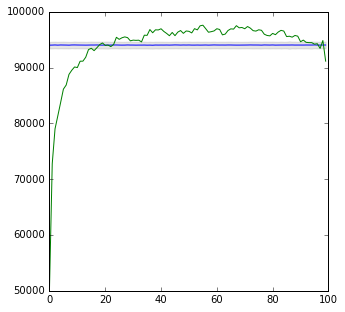

t 9.88347047737


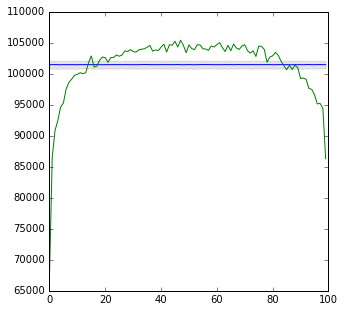

now 9.61092988439


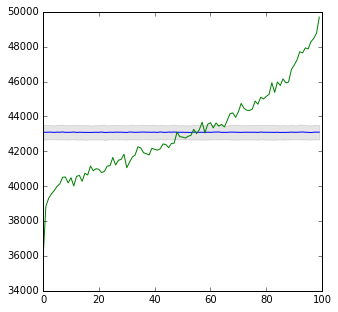

god 9.53114239465


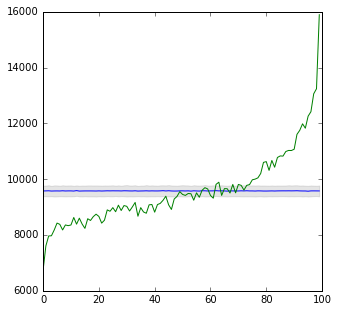

that 9.51547736354


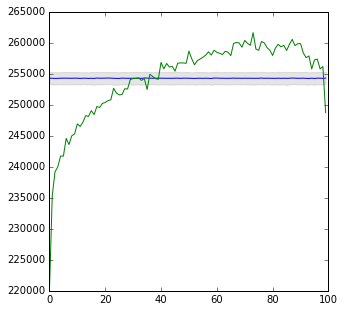

she 9.4109741878


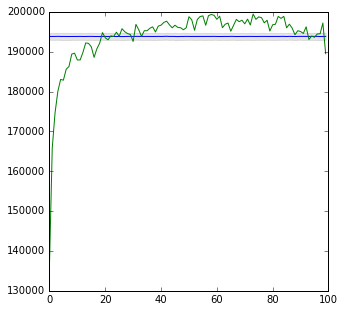

iv 9.28479594892


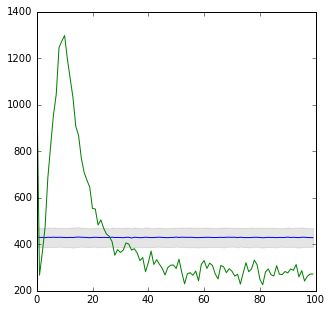

it 9.24578608217


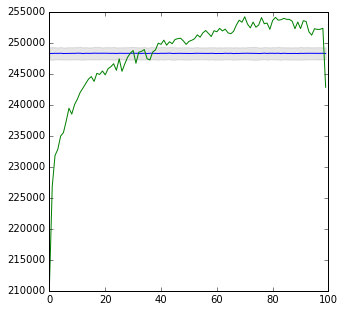

what 9.23750414217


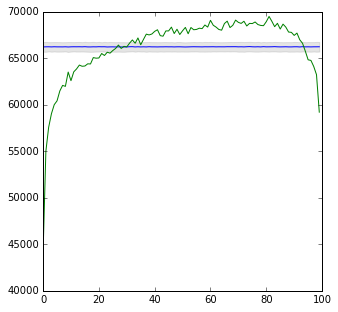

we 9.30211428262


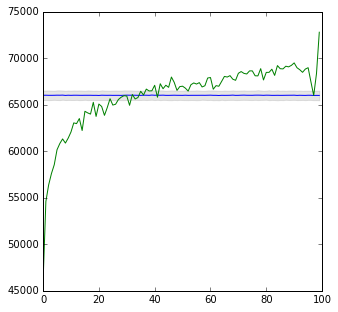

have 9.17108593147


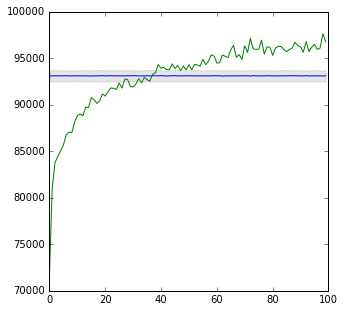

boy 9.17073520881


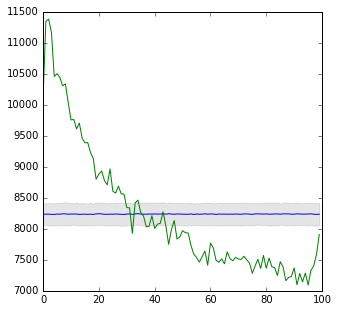

age 8.93795593272


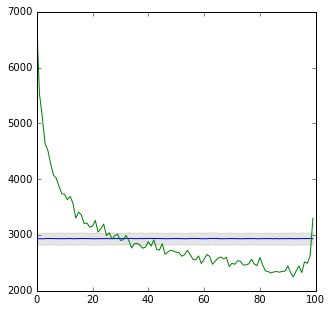

? 8.9477736588


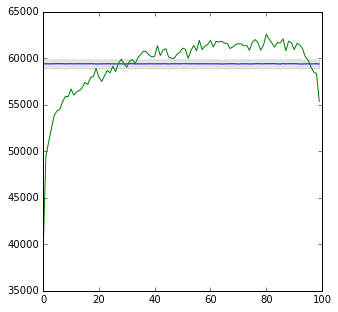

do 8.91541219695


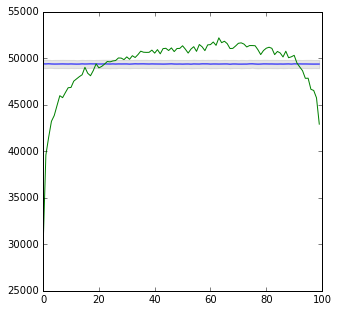

old 8.86843212203


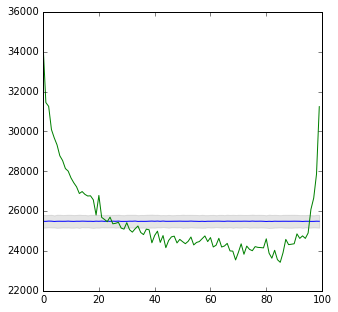

year 8.87830116026


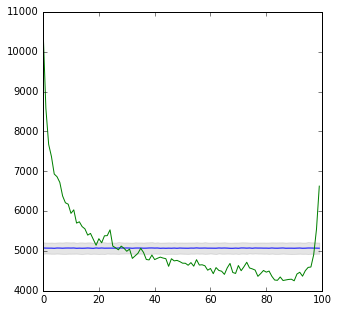

tall 8.83574192305


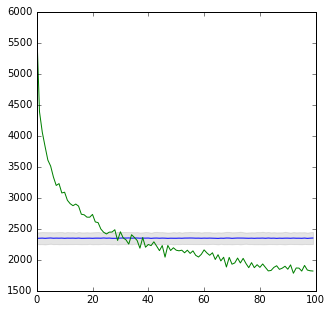

2 8.75836961351


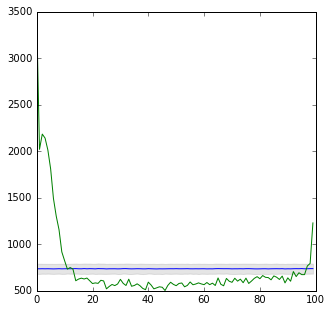

3 8.76612736095


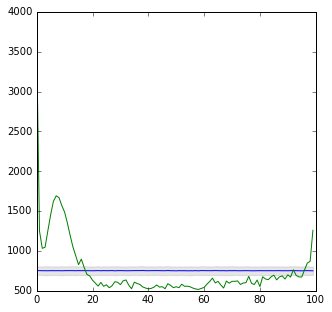

and 8.56097023537


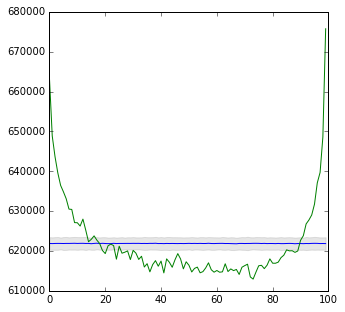

dead 8.557690463


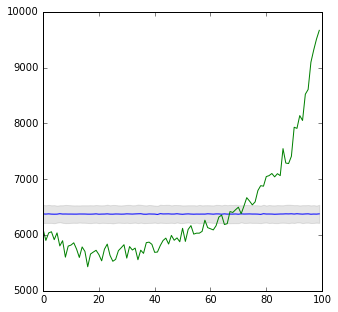

girl 8.48997472033


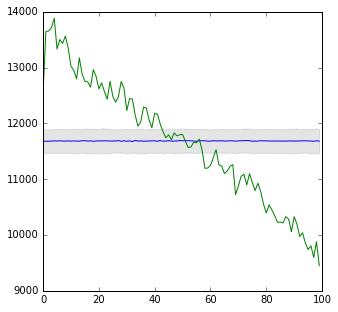

not 8.51685429996


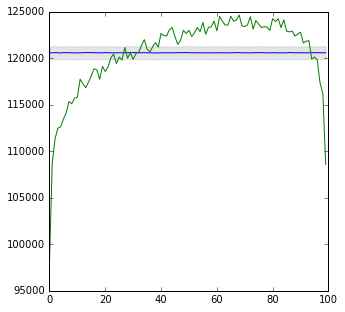

girls 8.38441544524


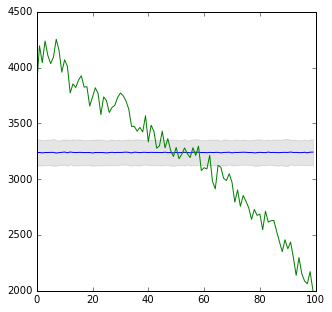

vii 8.34415877333


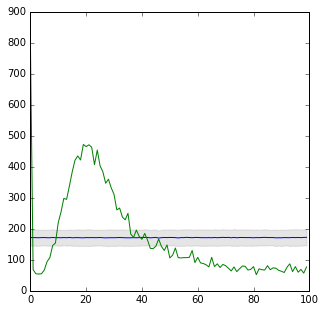

an 8.30107247069


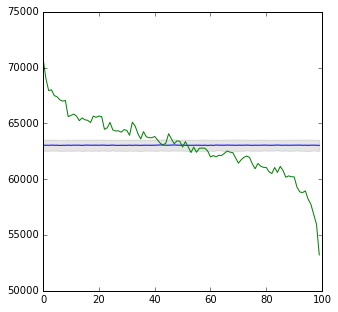

blue 8.22179633077


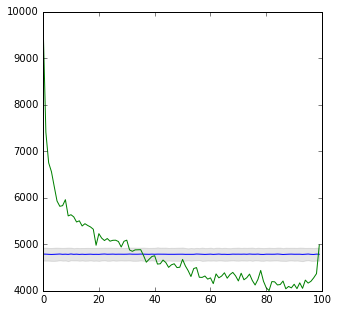

,” 8.24278135067


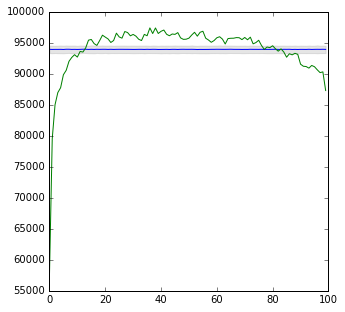

viii 8.15901721912


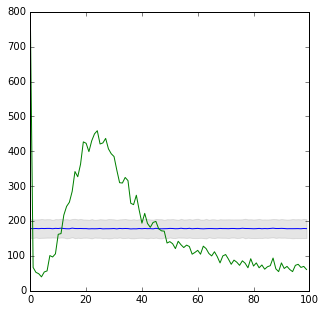

again 8.18715060462


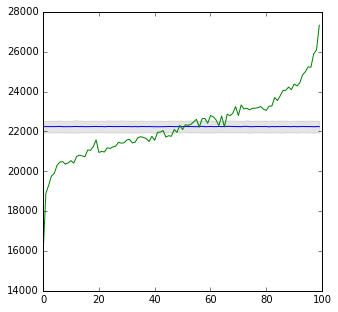

miss 8.02123067781


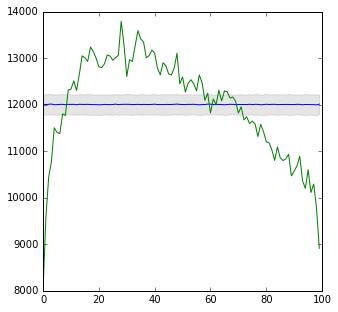

family 7.97089117853


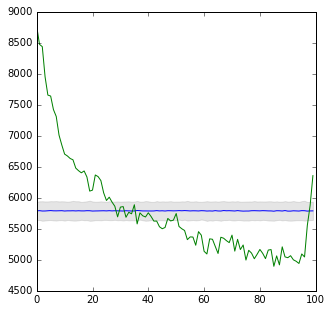

if 7.92970200688


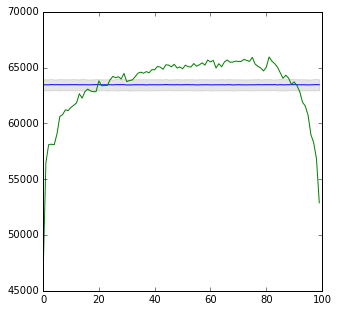

letter 7.92772008477


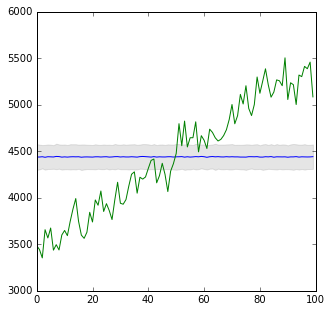

college 7.87604654707


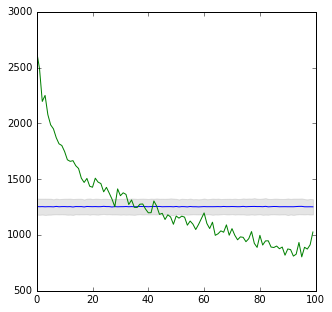

ix 7.8466863267


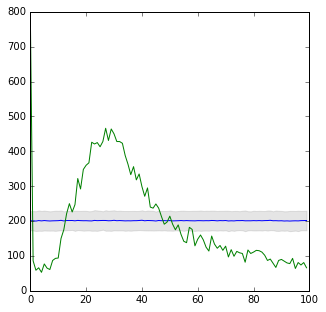

— 7.81464273025


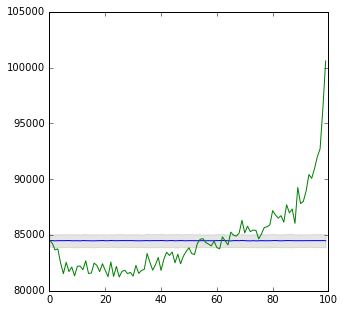

brown 7.75452489588


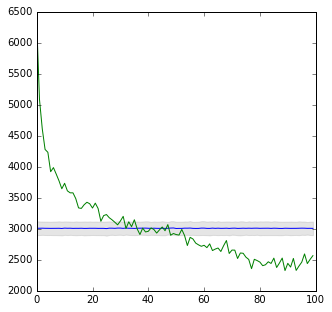

!” 7.74014985937


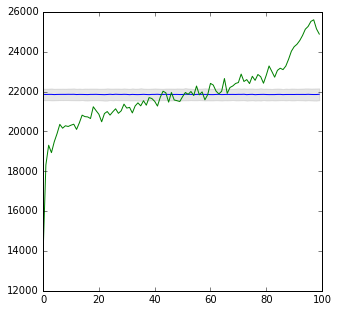

life 7.77187724152


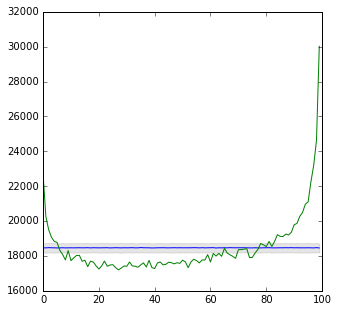

don 7.74894648778


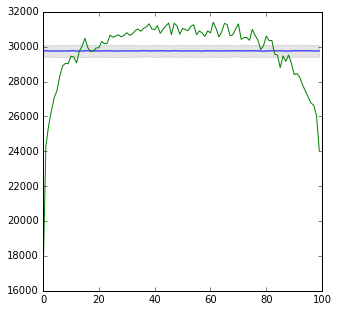

small 7.64994253546


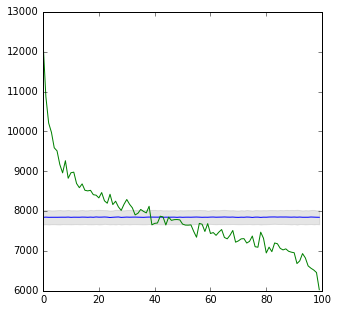

heart 7.68467845253


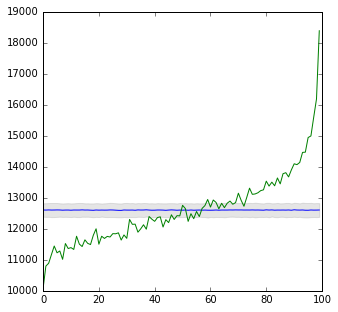

vi 7.67227429938


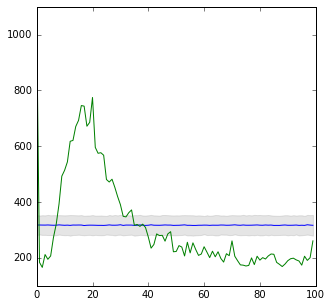

told 7.59129508401


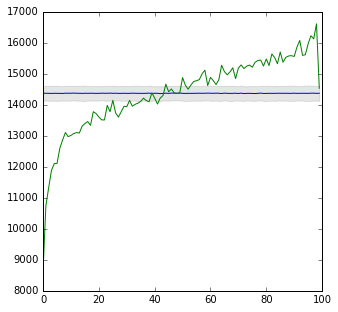

large 7.61132145109


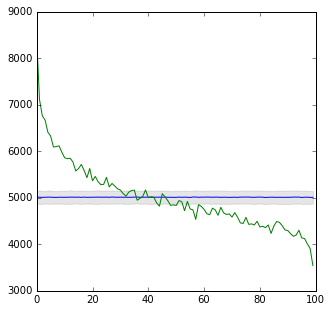

kill 7.54242846088


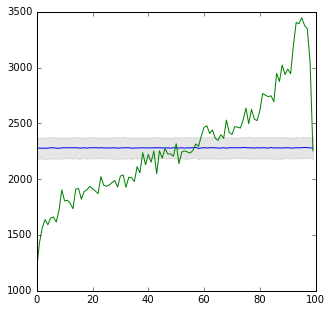

6 7.56331985283


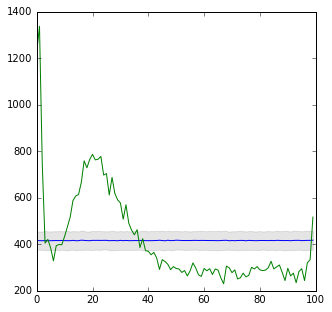

chapter 7.6326008649


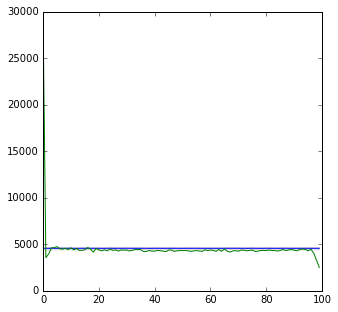

his 7.3670093371


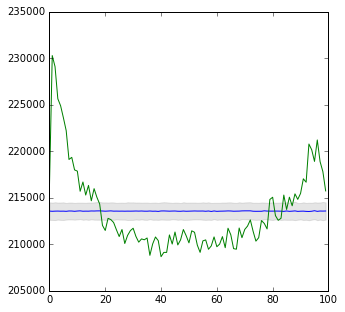

can 7.33701081855


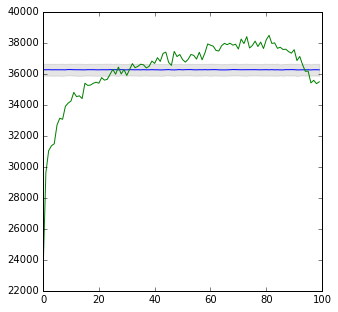

think 7.2763212715


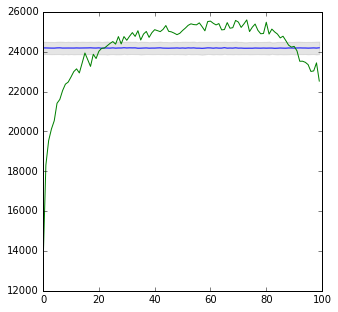

always 7.29162900822


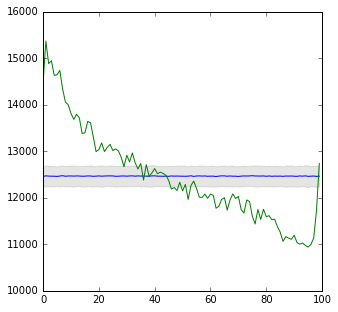

like 7.25861697998


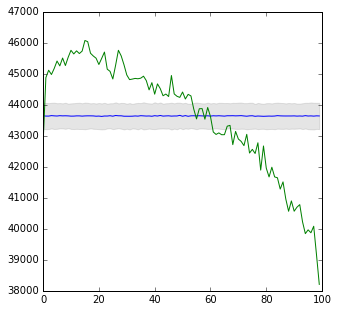

joy 7.20476327052


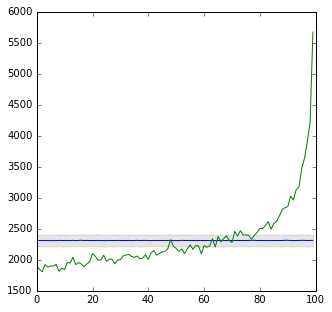

tell 7.16438456846


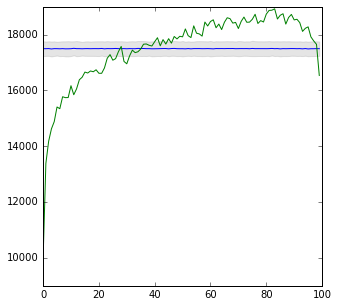

know 7.20217116624


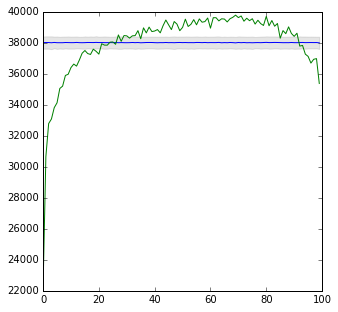

or 7.17622990056


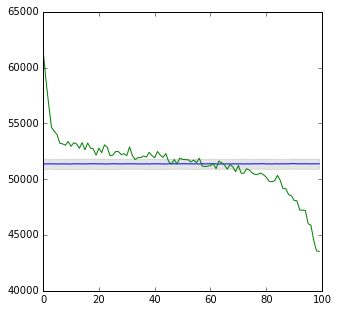

happiness 7.13256081558


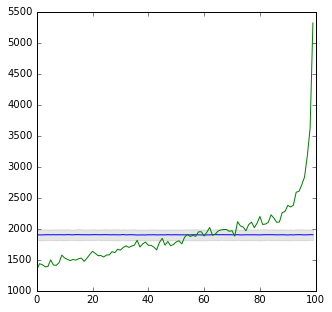

books 7.10361330873


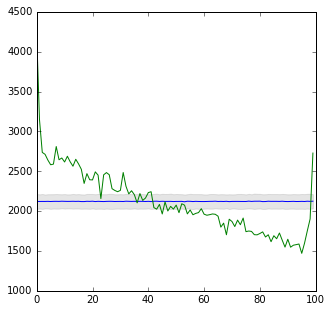

die 7.0583207407


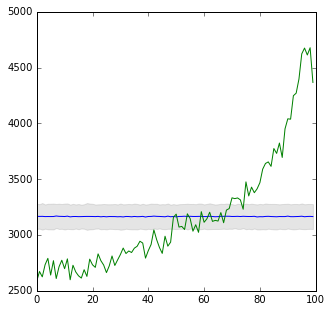

prisoner 7.04445801605


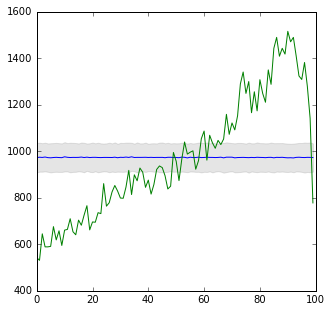

killed 7.05711947184


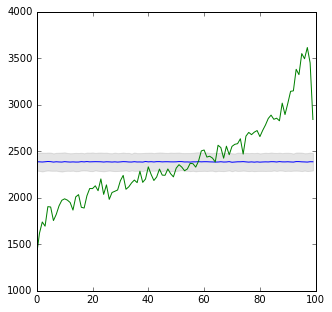

its 7.01416034796


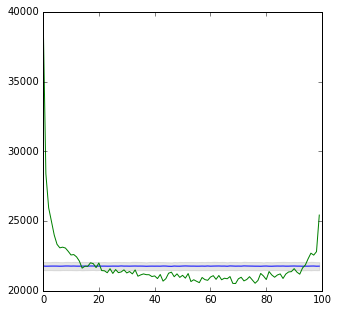

little 6.89170356335


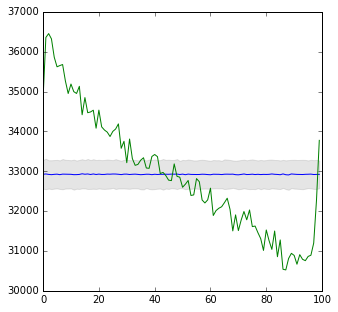

5 6.87923793906


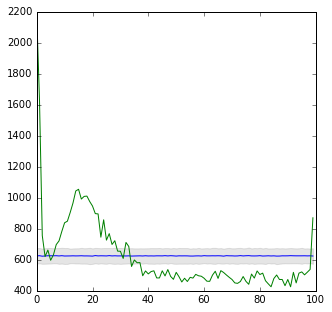

forgive 6.8978924299


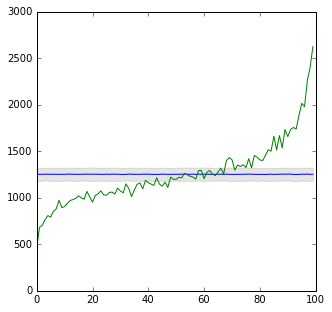

boys 6.84935371273


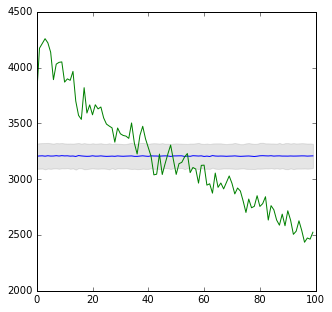

could 6.8935107179


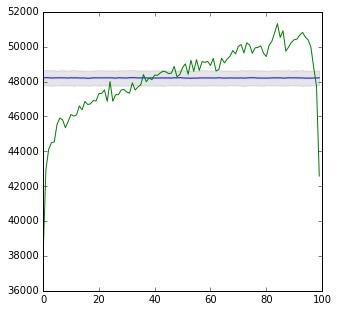

has 6.76098679906


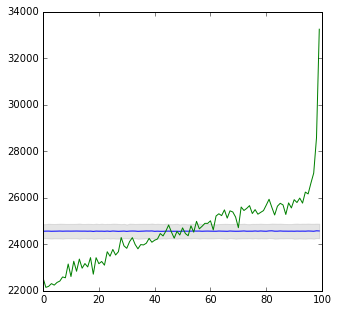

your 6.73814835844


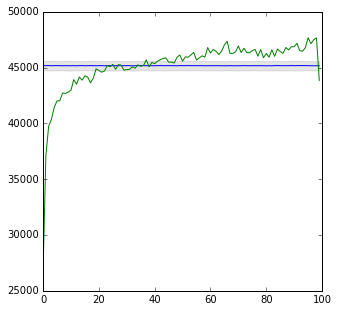

loved 6.68673590859


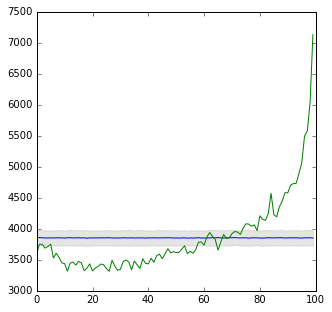

black 6.67127483064


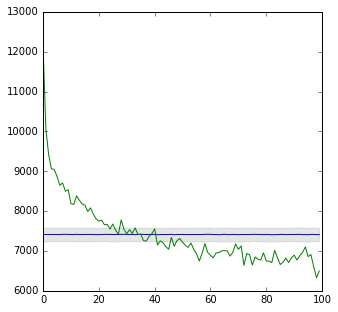

gun 6.56720928024


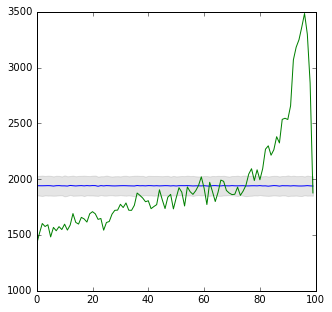

would 6.60229278044


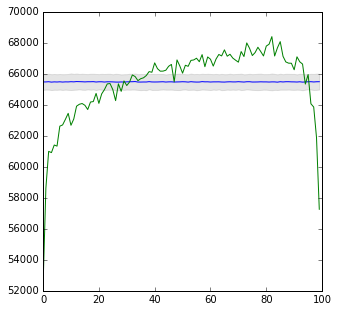

had 6.57743191916


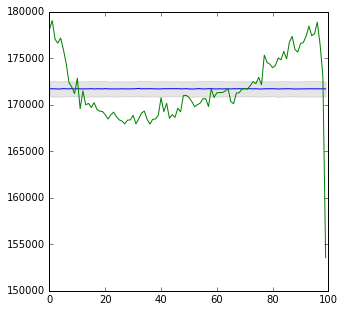

handsome 6.52710506663


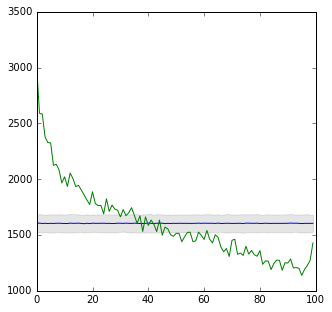

xii 6.47187294083


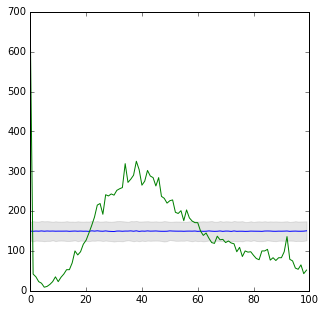

in 6.3971724112


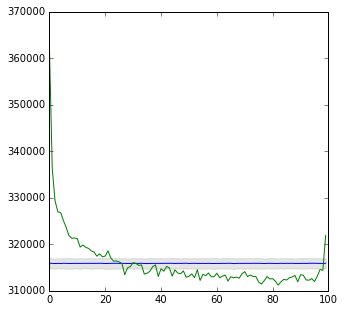

xi 6.42244750335


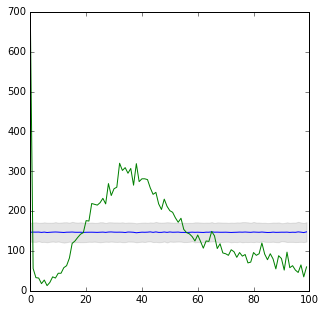

new 6.44507233544


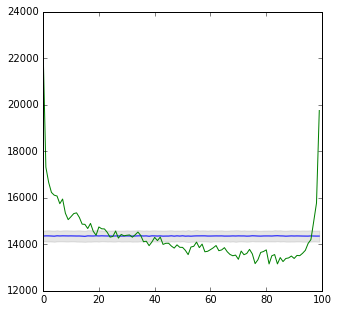

arms 6.3288395426


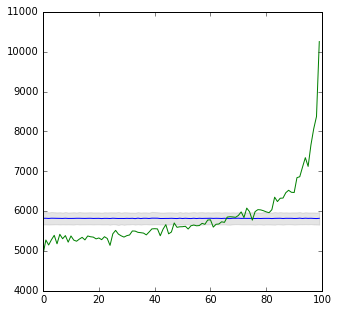

last 6.33353673184


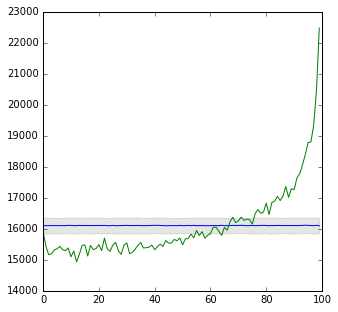

back 6.27539951057


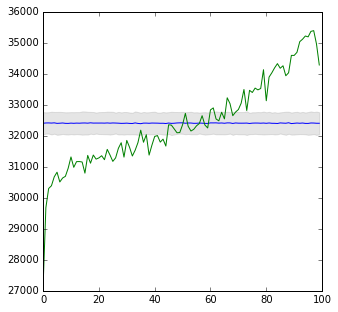

trial 6.25551966679


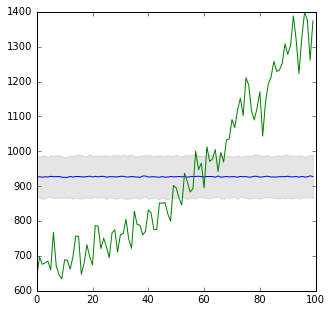

older 6.22710067359


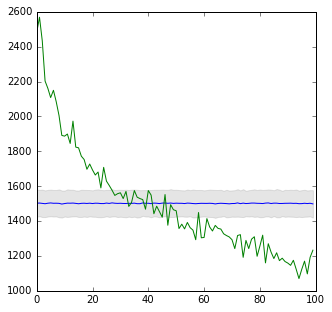

pretty 6.20091581382


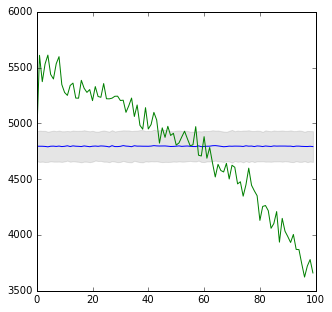

about 6.1774575739


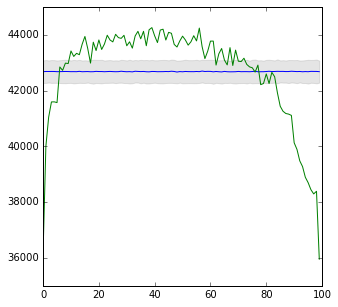

stranger 6.15110816656


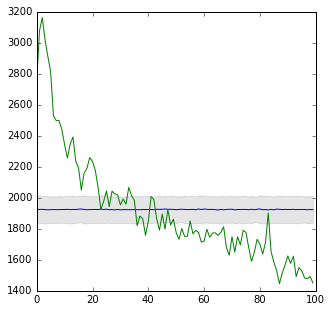

aunt 6.11665393698


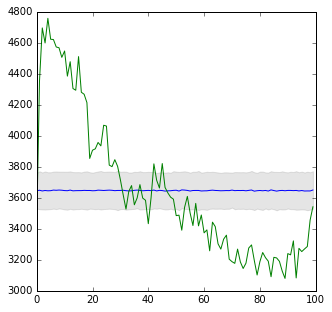

xiii 6.13387282734


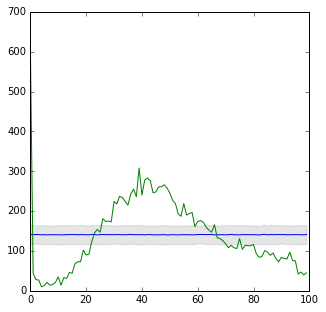

( 6.04696156023


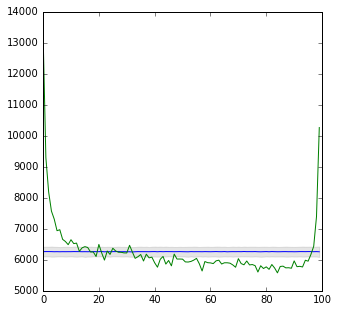

good 6.0883848959


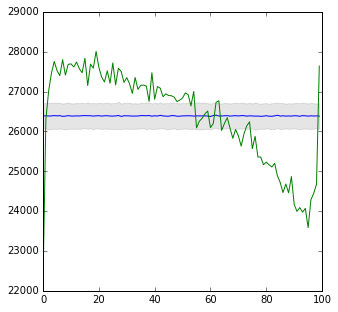

tears 6.05567790678


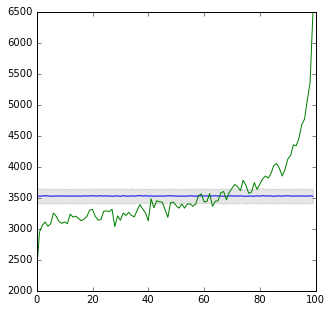

done 6.00947589393


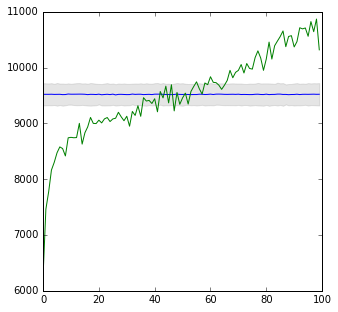

then 5.99829837078


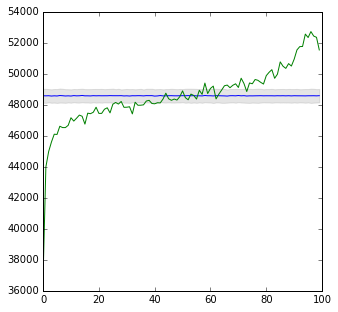

big 5.99414754295


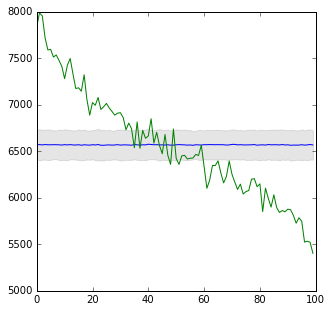

class 5.98546242085


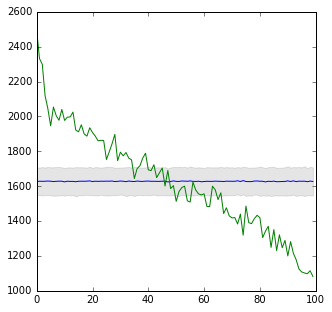

pain 5.94294753287


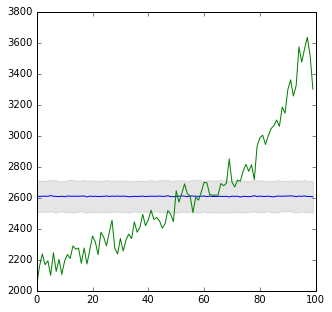

jury 5.95834371762


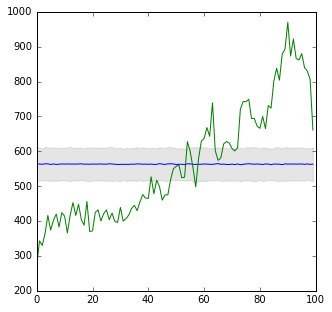

xx 5.91145640999


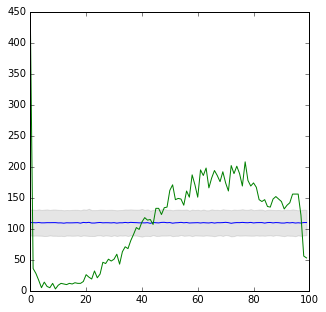

liked 5.88558159864


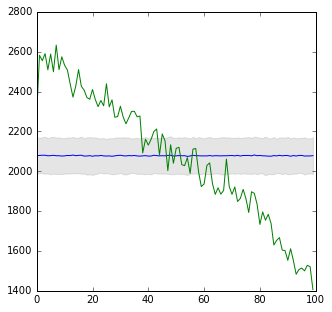

must 5.83770006164


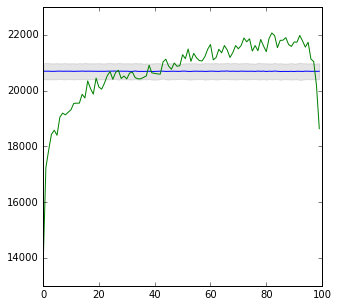

be 5.8808820634


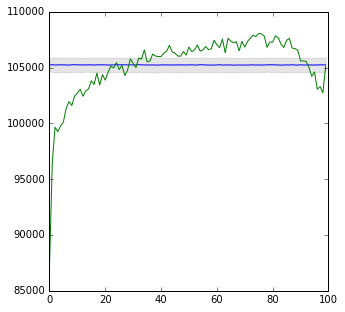

her 5.86687385076


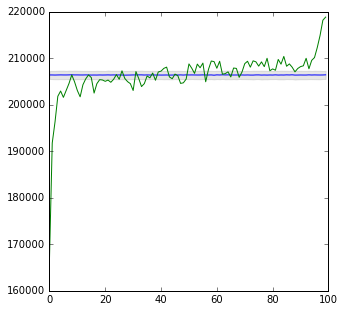

beauty 5.86520067037


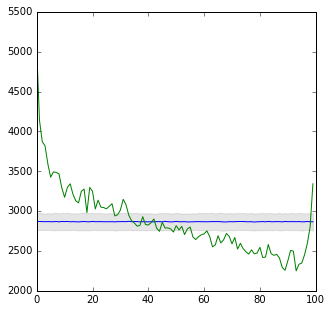

shall 5.85661315669


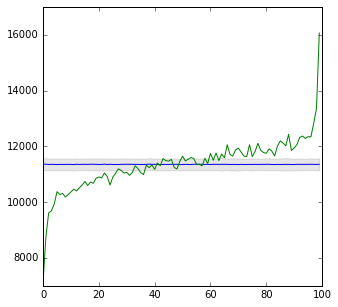

go 5.88468430659


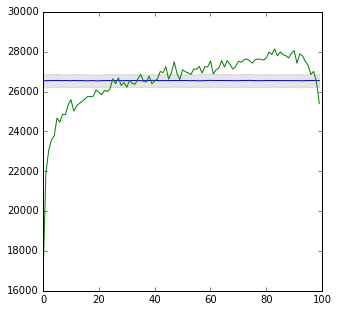

broad 5.84409415833


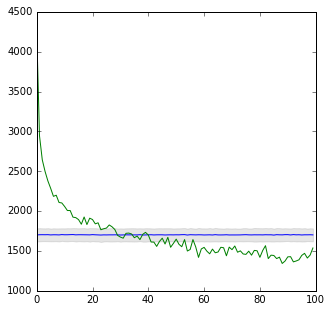

xix 5.86026261143


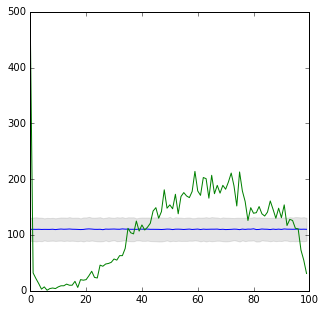

happy 5.85803626019


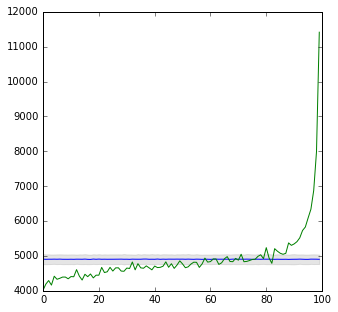

saw 5.82027508025


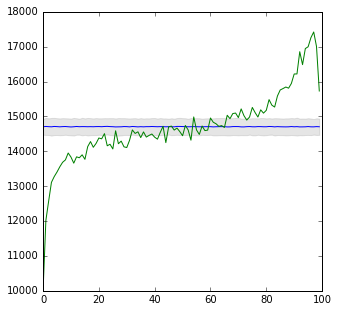

mrs 5.74920250817


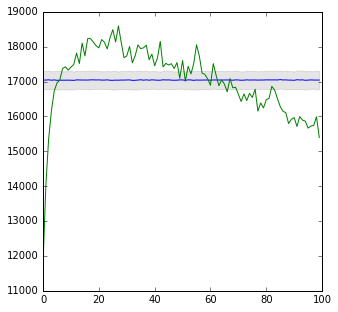

children 5.74186067531


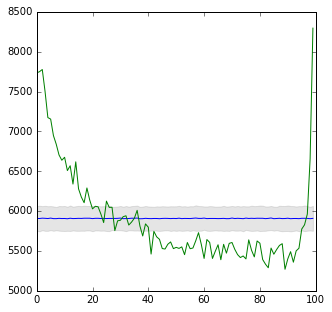

rather 5.75642324775


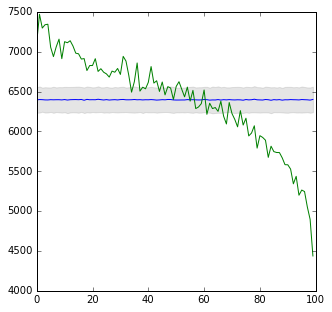

younger 5.74133338853


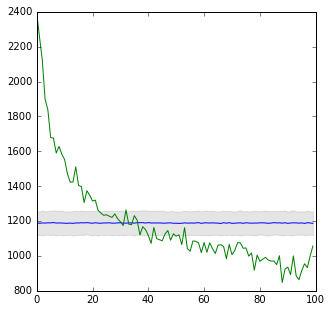

wedding 5.80114750594


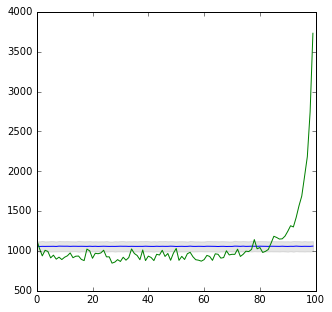

prison 5.79448249616


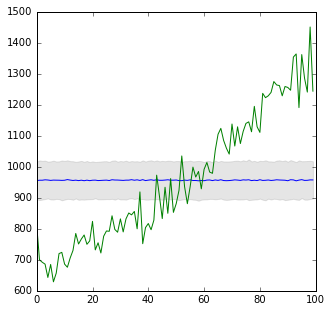

high 5.7266868813


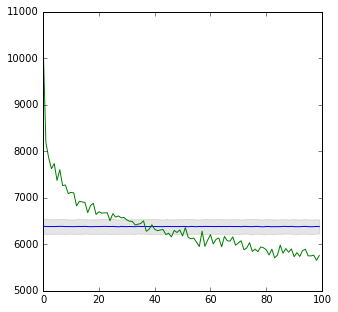

dying 5.77034772737


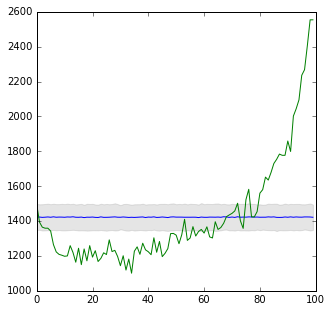

gone 5.70674493621


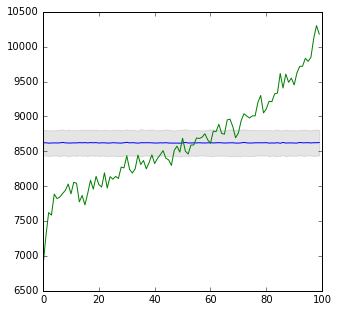

green 5.74199018445


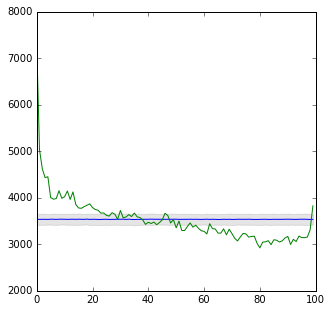

youth 5.7233778408


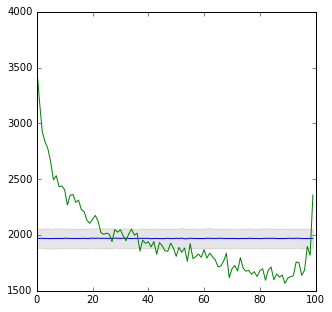

well 5.71330251793


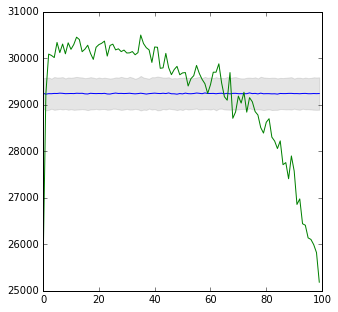

cried 5.68149528563


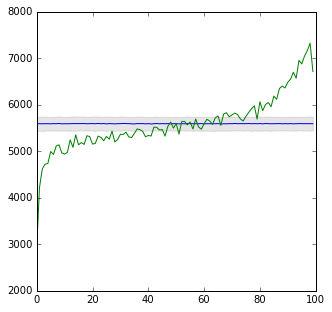

nose 5.68202872961


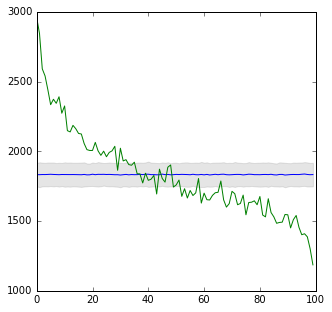

xiv 5.7139639918


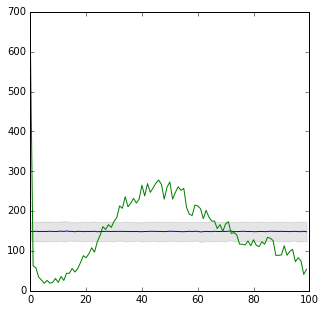

did 5.70292112653


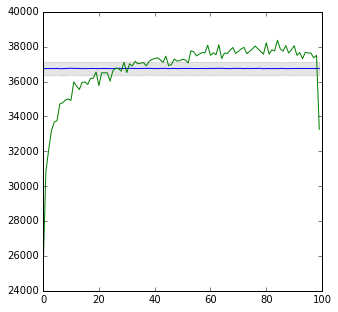

is 5.66090702394


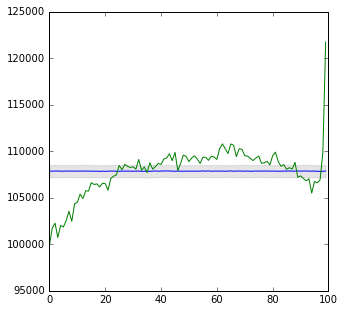

witness 5.63634973934


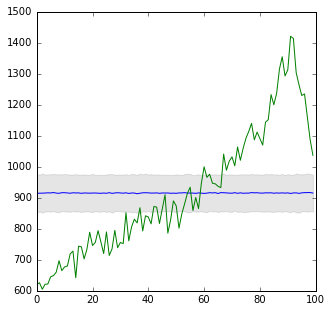

8 5.68142060441


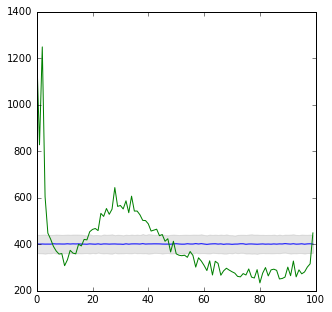

teacher 5.59429445981


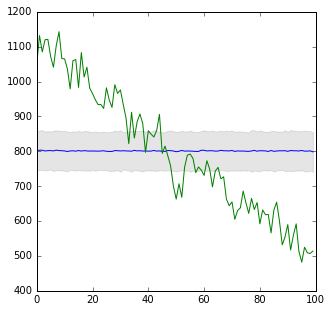

table 5.59023076763


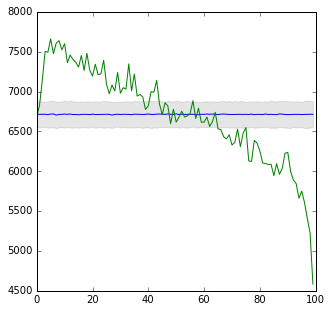

still 5.57653165417


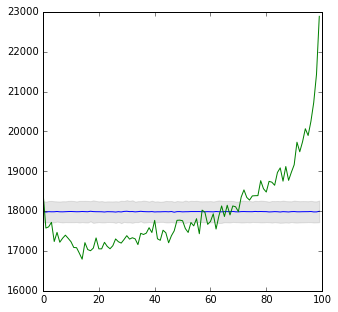

xvi 5.57091920207


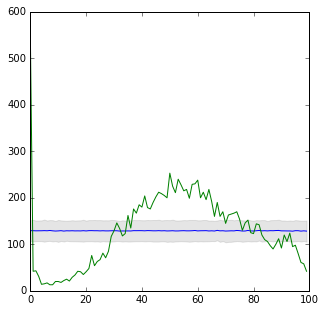

‘ 5.57314715883


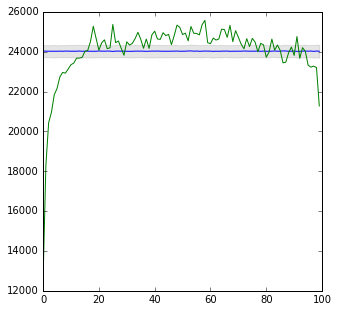

which 5.56286183244


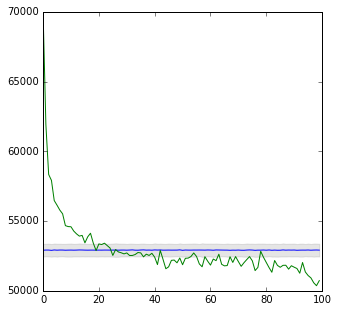

child 5.56948277535


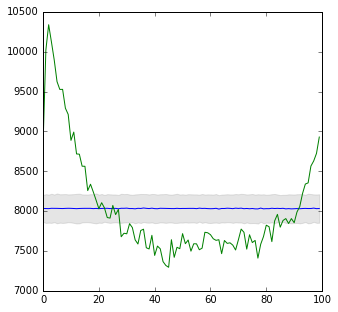

us 5.5230891174


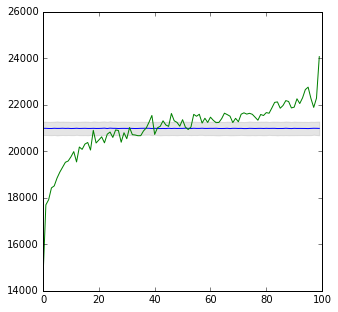

project 5.43095210756


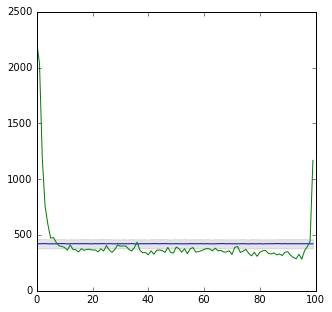

rich 5.55607167838


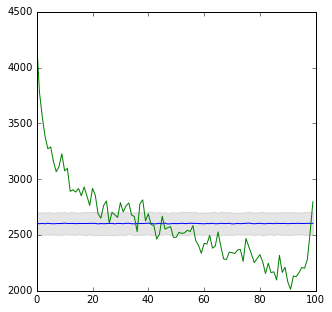

xviii 5.49808922657


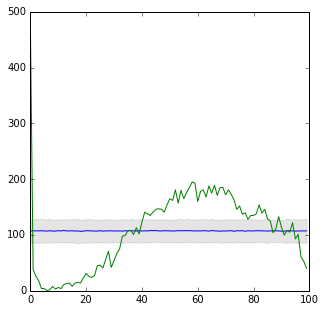

very 5.42979638646


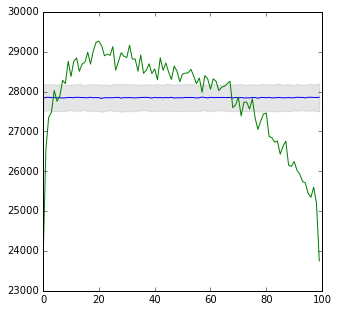

xvii 5.42135956042


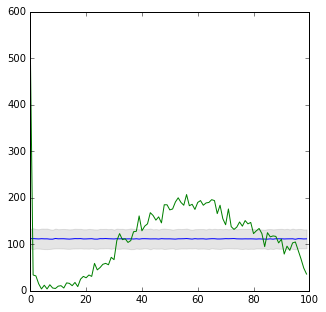

lived 5.51831658444


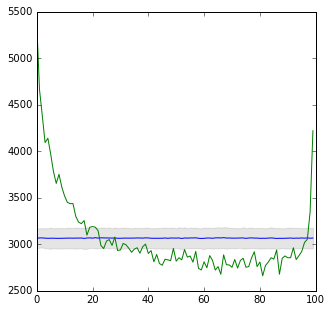

usually 5.48286838991


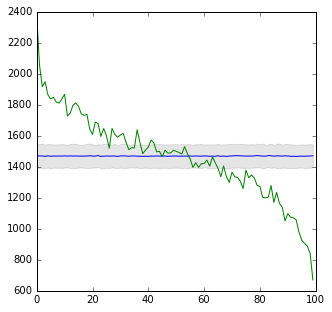

evidence 5.45049816123


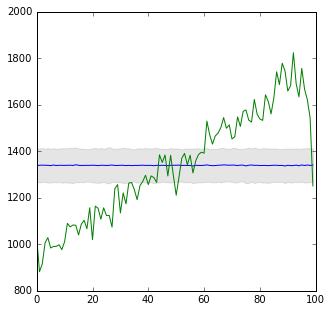

mr 5.41172664622


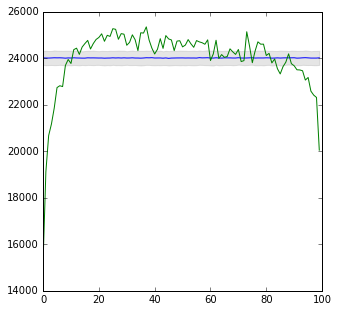

" 5.47527234639


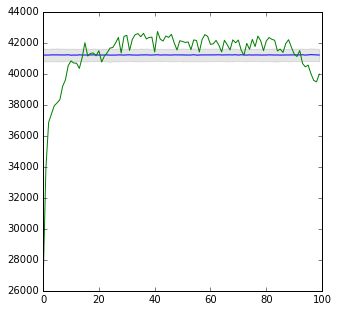

dinner 5.42220694515


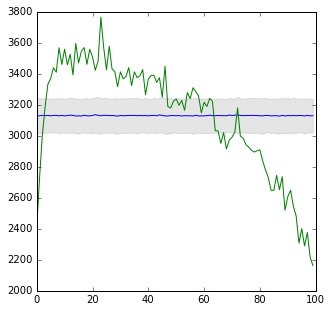

no 5.37709629959


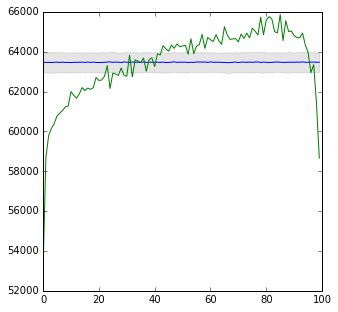

uncle 5.40489526887


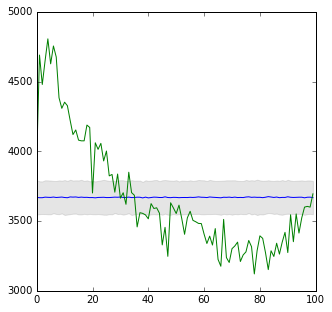

leave 5.42289454194


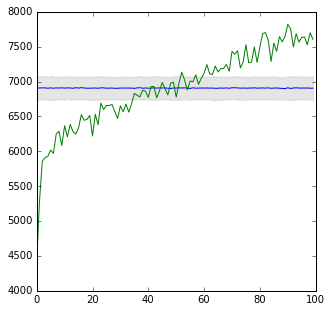

died 5.334331582


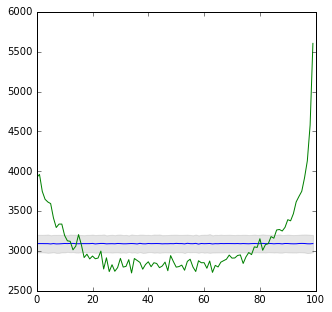

often 5.35367491389


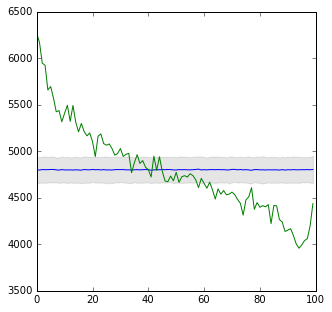

let 5.33677559083


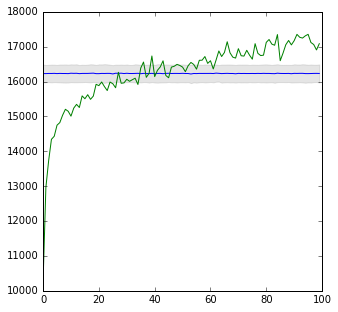

was 5.30930888481


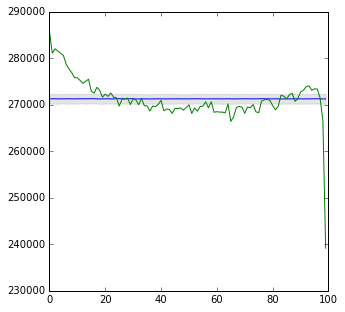

murder 5.31148703882


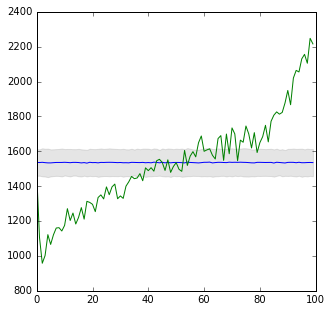

most 5.35584474855


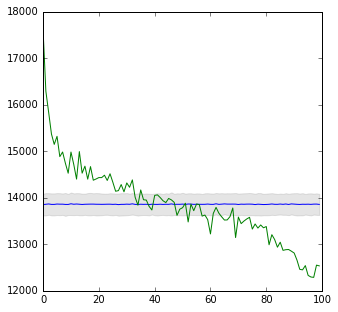

come 5.34317563265


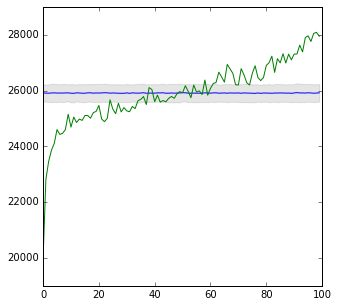

with 5.32628567136


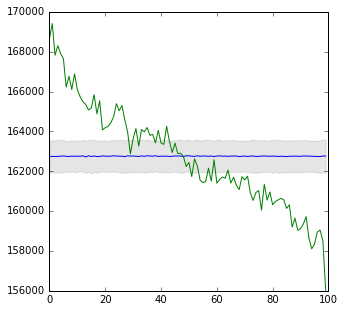

xv 5.33453483788


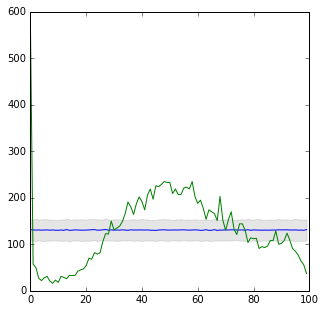

hope 5.24861618783


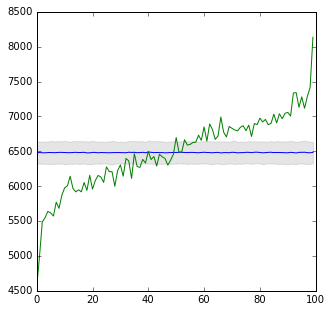

education 5.28195909156


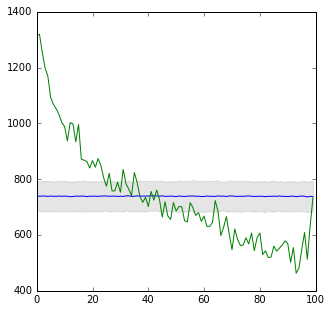

some 5.23796475624


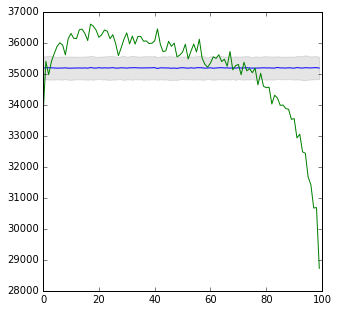

arrest 5.24387413418


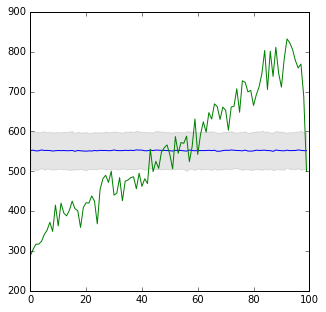

fine 5.23665259842


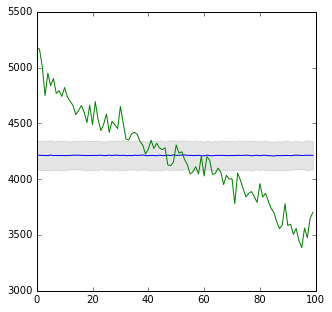

parents 5.17567536869


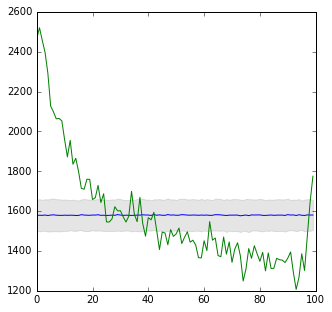

… 5.18603463465


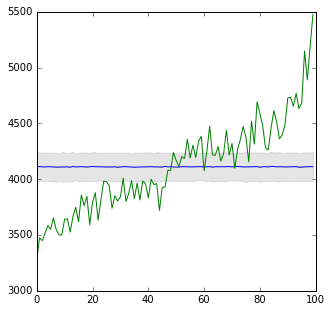

longer 5.19850649977


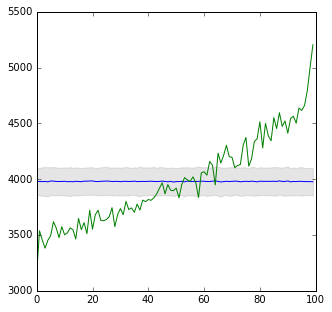

pistol 5.16316420776


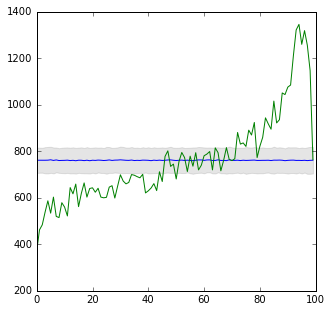

In [12]:
for token in df['token'].head(200):
    plot_bootstrap(token)